In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis

In [2]:
dataset = pd.read_csv("weather-data.csv")

dataset.info()

# Show the first five results.
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


The entire 'peak_wind_drct' column is null, and only 1204 non-null in 'gust', so I will drop the two columns. I will also drop station, since it's not going to be useful for our modelling. 

In [3]:
#stats for dataset
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


### Correlation Plot

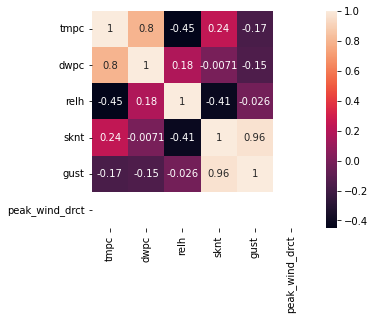

In [4]:
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix, annot=True, square = True)
plt.show()

There doesn't seem to be a very strong correlation between a lot of the features, although 'sknt' and 'gust' have a very strong correlation of 0.96, and 'dwpc' and 'tmpc' have a correlation of 0.8. 

In [5]:
# convert valid to datetime format
dataset['valid'] = pd.to_datetime(dataset.valid)

# extract numerical values from datetime object
dataset['year'] = dataset['valid'].dt.year
dataset['month'] = dataset['valid'].dt.month
dataset['week'] = dataset['valid'].dt.week
dataset['day'] = dataset['valid'].dt.day
dataset['hour'] = dataset['valid'].dt.hour
dataset['minute'] = dataset['valid'].dt.minute
dataset['dayofweek'] = dataset['valid'].dt.dayofweek
dataset['date'] = dataset['valid'].dt.date


#dataset.drop(dataset.columns[[0, 6, 7]], inplace = True) <- This showed me that "station" is actually " station" 
dataset.drop(columns=[' station', 'gust', 'peak_wind_drct', 'valid'], inplace=True)

#drop na values
dataset.dropna(axis=0, inplace= True)

dataset.head()

C:\Users\Boetmate\AppData\Local\Temp\ipykernel_24948\259582386.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset['week'] = dataset['valid'].dt.week


,tmpc,dwpc,relh,sknt,year,month,week,day,hour,minute,dayofweek,date
0,21.0,11.0,52.77,15.0,2015,1,1,1,0,0,3,2015-01-01
1,21.0,10.0,49.37,16.0,2015,1,1,1,0,30,3,2015-01-01
2,21.0,12.0,56.38,16.0,2015,1,1,1,1,0,3,2015-01-01
3,21.0,13.0,60.21,16.0,2015,1,1,1,1,30,3,2015-01-01
4,21.0,12.0,56.38,16.0,2015,1,1,1,2,0,3,2015-01-01


### Graph Numerical Data


    year  month        tmp
0   2015      1  20.708277
1   2015      2  19.776187
2   2015      3  19.379755
3   2015      4  16.747159
4   2015      5  13.940086
..   ...    ...        ...
67  2020      8  12.259259
68  2020      9  12.985396
69  2020     10  15.549865
70  2020     11  17.100418
71  2020     12  18.346074

[72 rows x 3 columns]


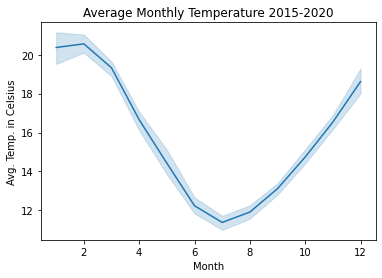

In [36]:
# group by month and year, find average temperature 
grouped_tmp = dataset.groupby(['year','month'])['tmpc'].mean().reset_index(name='tmp')

# plot graph over time 
monthly_temp = sns.lineplot(x = 'month', y = 'tmp',data = grouped_tmp)
monthly_temp.set_title("Average Monthly Temperature 2015-2020")
monthly_temp.set_xlabel("Month")
monthly_temp.set_ylabel("Avg. Temp. in Celsius")

print(grouped_tmp)

Text(0, 0.5, 'Avg. Temp. in Celsius')

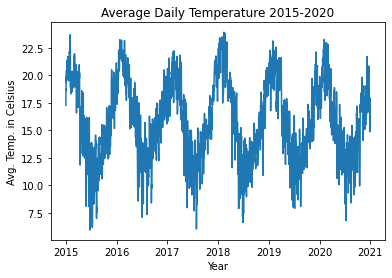

In [37]:
# use datetime stamp

# group dataset by year, then calculate avg temp for the year

# display the dataframe


# max_temp = dfall.groupby([(dfall.Date.dt.month),(dfall.Date.dt.day)])['Data_Value'].max()
dataset_dates = dataset.groupby(['date'])['tmpc'].mean().reset_index(name='tmp')
# tmp_2015 = dataset.groupby('month')['tmpc'].mean().reset_index(name='dwpc')



# plot graph over time 
daily_temp = sns.lineplot(x = 'date', y = 'tmp',data = dataset_dates)
daily_temp.set_title("Average Daily Temperature 2015-2020")
daily_temp.set_xlabel("Year")
daily_temp.set_ylabel("Avg. Temp. in Celsius")




Text(0, 0.5, 'Avg. Dew Point')

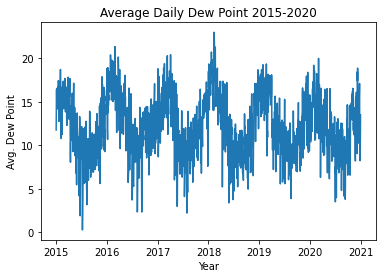

In [22]:
# group dataset by year, then calculate avg dwpc for the year

avg_dwpc = dataset.groupby(['date'])['dwpc'].mean().reset_index(name='dwpc')



# plot graph over time 
daily_dwpc = sns.lineplot(x = 'date', y = 'dwpc',data = avg_dwpc)
daily_dwpc.set_title("Average Daily Dew Point 2015-2020")
daily_dwpc.set_xlabel("Year")
daily_dwpc.set_ylabel("Avg. Dew Point")

,date,relh
0,2015-01-01,71.744792
1,2015-01-02,74.600417
2,2015-01-03,84.732708
3,2015-01-04,81.855417
4,2015-01-05,78.601667


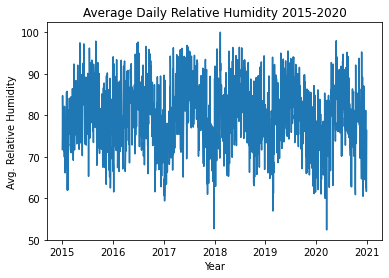

In [38]:
# group dataset by year, then calculate avg relh for the year

avg_relh = dataset.groupby(['date'])['relh'].mean().reset_index(name='relh')



# plot graph over time 
daily_relh = sns.lineplot(x = 'date', y = 'relh',data = avg_relh)
daily_relh.set_title("Average Daily Relative Humidity 2015-2020")
daily_relh.set_xlabel("Year")
daily_relh.set_ylabel("Avg. Relative Humidity")

avg_relh.head()

,date,sknt
0,2015-01-01,7.875000
1,2015-01-02,8.645833
2,2015-01-03,5.333333
3,2015-01-04,5.208333
4,2015-01-05,6.020833


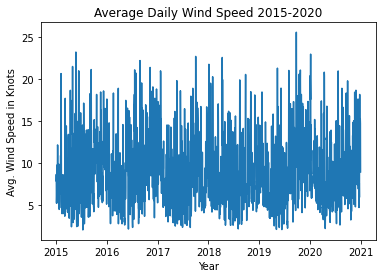

In [39]:
# group dataset by year, then calculate avg relh for the year

avg_sknt = dataset.groupby(['date'])['sknt'].mean().reset_index(name='sknt')



# plot graph over time 
daily_sknt = sns.lineplot(x = 'date', y = 'sknt',data = avg_sknt)
daily_sknt.set_title("Average Daily Wind Speed 2015-2020")
daily_sknt.set_xlabel("Year")
daily_sknt.set_ylabel("Avg. Wind Speed in Knots")

avg_sknt.head()

Looking at the graphs, the temperature seems to have the least variability, and would likely be the best choice for making an accurate model. 